In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.4     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
-- Attaching packages -------------------------------------- tidymodels 1.1.1 --

v broom        1.0.5     v rsample      1.2.0
v dials        1.2.0     v tune         1.1.2
v infer        1.0.5     v workflows    1.1.3
v modeldata    1.2.0     v workflowsets 1.0.1
v parsnip      1.1.1     v yardstick    1.2.0
v recipes      1.0.8     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard() masks purrr::discard()
x dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [13]:
key_stats <- read_csv("data/key_stats.csv")
defending <- read_csv("data/defending.csv")
distribution <- read_csv("data/distributon.csv")
football <- merge(key_stats, defending, by = "player_name") |>
    merge(distribution, by = "player_name")
football

Rows: 747 Columns: 8
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): player_name, club, position, distance_covered
dbl (4): minutes_played, match_played, goals, assists

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 627 Columns: 10
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): serial, player_name, club, position
dbl (6): balls_recoverd, tackles, t_won, t_lost, clearance_attempted, match_...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 608 Columns: 12
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (4): serial, player_name, club, position
dbl (8): pass_accuracy, pass_attempted, pass_completed, cr

player_name,club.x,position.x,minutes_played,match_played.x,goals,assists,distance_covered,serial.x,club.y,...,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<U+00C1>lvarez,Ajax,Midfielder,558,7,0,0,73,121,Ajax,...,Ajax,Midfielder,93.3,363,340,0,1,0,7,7
<U+00C9>der Milit<U+00E3>o,Real Madrid,Defender,1076,12,0,0,110.4,01,Real Madrid,...,Real Madrid,Defender,87.5,643,563,0,2,0,17,12
<U+00D3>liver Torres,Sevilla,Midfielder,168,4,0,0,25.8,479,Sevilla,...,Sevilla,Midfielder,79.5,122,105,20,5,1,2,4
...,...,...,...,...,...,...,...,...,...,,...,...,...,...,...,...,...,...,...,...
Zeki <U+00C7>elik,LOSC,Defender,591,7,0,1,71.3,121,LOSC,...,LOSC,Defender,78.0,297,233,33,12,4,9,7
Zinchenko,Man. City,Defender,501,8,0,1,64.4,102,Man. City,...,Man. City,Defender,88.0,356,314,23,13,3,4,8
Ziyech,Chelsea,Midfielder,446,9,1,2,53.5,317,Chelsea,...,Chelsea,Midfielder,76.8,240,186,26,41,11,3,9


In [31]:
football_data <- football |>
    mutate(position = as_factor(position)) |>
    mutate(distance_covered = as.numeric(distance_covered)) |>
    filter(match_played < 7 && position != "Goalkeeper") |>
    select(position, goals, distance_covered, pass_attempted, tackles, clearance_attempted)
football_data

position,goals,distance_covered,pass_attempted,tackles,clearance_attempted
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Midfielder,0,25.8,122,0,0
Forward,0,63.0,76,2,2
Forward,0,32.1,58,0,1
...,...,...,...,...,...
Defender,0,45.9,152,7,14
Forward,3,50.1,130,2,3
Defender,0,51.0,188,4,3


In [32]:
football_split <- initial_split(football_data, prop = 0.75, strata = position)
football_train <- training(football_split)
football_test <- testing(football_split)
football_train

position,goals,distance_covered,pass_attempted,tackles,clearance_attempted
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Defender,0,43.2,275,8,4
Defender,0,46.3,225,6,24
Defender,0,50.6,299,5,12
...,...,...,...,...,...
Midfielder,1,59.1,295,8,6
Midfielder,2,31.6,97,4,1
Midfielder,0,59.8,311,5,5


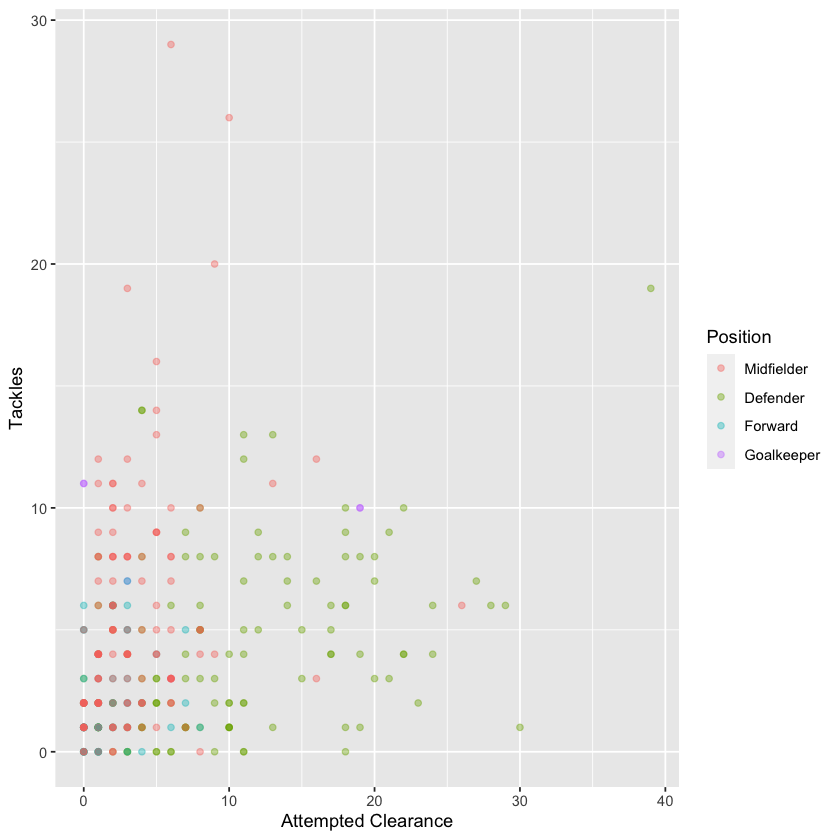

In [33]:
football_plot <- football_train |>
    ggplot(aes(x = clearance_attempted, y = tackles, color = position)) +
    geom_point(alpha = 0.4) +
    labs(x = "Attempted Clearance", y = "Tackles", color = "Position")
football_plot